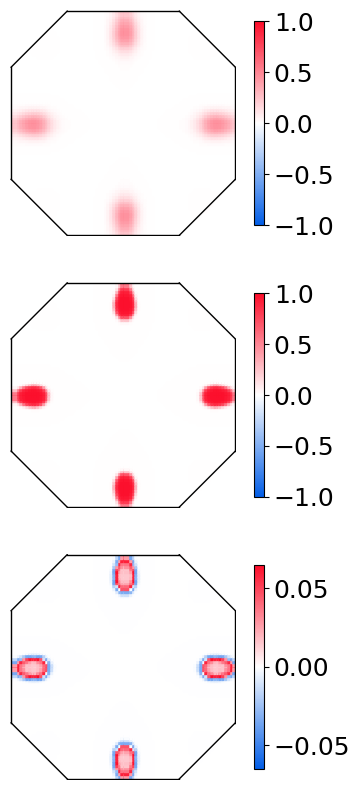

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import colorsys
from scipy.interpolate import griddata

### load data
kpts = np.loadtxt('kpts.dat')
bg = np.loadtxt('bg.dat')
epop0 = np.loadtxt('electron_pop_0ps.dat')[np.newaxis,:,:]
epop1 = np.loadtxt('electron_pop_1ps.dat')[np.newaxis,:,:]
epop2 = np.loadtxt('electron_pop_20ps.dat')[np.newaxis,:,:]
epop = np.concatenate((epop0, epop1, epop2))
### compute difference for the last time snapshot
epop[2,:,:] = epop[2,:,:]-epop[1,:,:]
labels = [r'$f_{n\mathbf{k}}$',r'$f_{n\mathbf{k}}$',r'$\Delta f_{n\mathbf{k}}$']

# plotting electron population for kz = 0
inds = np.where(np.abs(kpts[:,2])<0.001)[0]
kx = kpts[inds,0]
ky = kpts[inds,1]

hsv_red = (0.98, 0.95, 0.99) 
hsv_blue = (0.60, 0.99, 0.9) 
rgb_red = colorsys.hsv_to_rgb(*hsv_red)
rgb_blue = colorsys.hsv_to_rgb(*hsv_blue)

# Define a custom colormap with an exact white midpoint
colors = [
    (0.0, rgb_blue),
    (0.5, "white"),   # Force exact white midpoint
    (1.0, rgb_red),
]
custom_cmap = LinearSegmentedColormap.from_list("", colors)


# plot
fig, ax = plt.subplots(3,1, figsize=(4.5,10))
for it in range(3):
    if it<2:
        v = 1.0
    else:
        v = np.max(epop[2:,:,:])
    # plot only the lowest conduction band, because the higher one is not as interesting.
    for ibnd in range(1):
        scatter=ax[it].scatter(kx, ky, c=epop[it,inds,ibnd],alpha=1.0,cmap=custom_cmap,s=6,marker='s',vmin=-v, vmax=v)
        ax[it].set_aspect('equal')
        ax[it].set_axis_off()
        ax[it].set_xlim([-1.01,1.01])
        ax[it].set_ylim([-1.01,1.01])
    cbar = plt.colorbar(scatter,shrink=0.9)

    cbar.ax.tick_params(labelsize=18)
    #cbar.ax.xaxis.set_label_position('top')

# plot BZ borders
newBZ = np.array([[0.5, 1.0], [-0.5, 1.0], [-1.0, 0.5], [-1.0,-0.5],
                  [-0.5, -1.0], [0.5, -1.0], [1.0, -0.5], [1.0,0.5],[0.5,1.0]])

for i in range(1,len(newBZ)):
    for it in range(3):
        ax[it].plot([newBZ[i-1,0],newBZ[i,0]], [newBZ[i-1,1],newBZ[i,1]], lw=1, c='k')
        #plt.subplots_adjust(left=-1.0, right=2, bottom=0, top=1)

plt.savefig('figure4a.png',dpi=600)     
#plt.show()